### 1. 문제 정의(목표 설정)
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해볼 것.
- 머신러닝 전체 과정 실행

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2. 데이터 수집(Kaggle 사이트에서 로드)

In [ ]:
# 데이터 정보
# 1. Pclass : 승객의 등급 (1 ~ 3)
# 2. Survived : 생존 여부(0 = 사망 / 1 = 생존)
# 3. Name : 승객의 이름
# 4. Sex : 승객의 성별
# 5. Age : 승객의 나이
# 6. SibSp : 동승한 형제 또는 배우자 수
# 7. Parch : 동승한 부모 또는 자녀의 수
# 8. Ticket : 티켓 번호
# 9. Fare : 승객 지불 요금
# 10. Cabin : 선실 요금
# 11. Embarked : 승선항(C : 쉘부르크 / S : 사우스햄튼 / Q : 퀸즈타운)

### 타이타닉의 구조
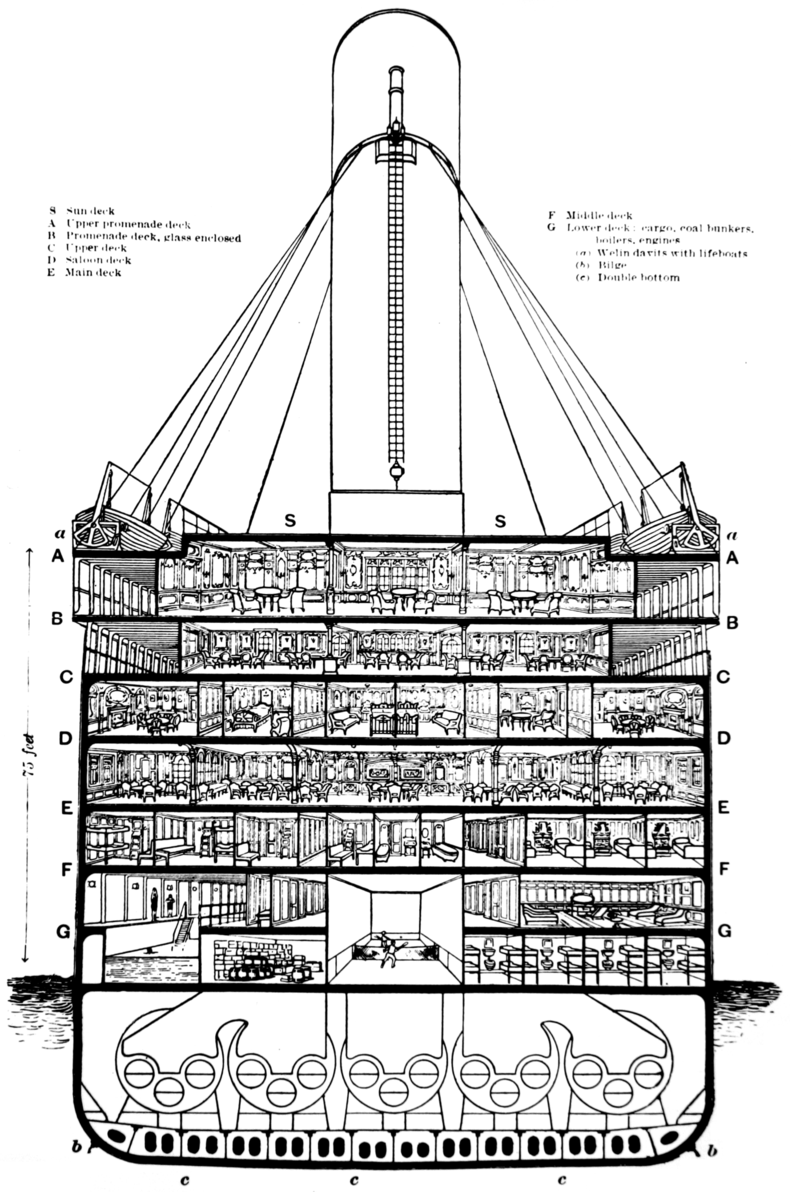

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝


In [ ]:
# 경로 재설정
%cd /content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝

/content/drive/MyDrive/Colab Notebooks/인사교_컴퓨터비전A_머신러닝


In [ ]:
# 데이터 로딩
train = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 현재 데이터는 3가지 파일로 구성되어 있음
- train : 정답에 해당하는 Survived 컬럼이 존재하는 파일
- test : Survived 컬럼이 존재하지 않는 파일 -> 우리가 정답을 예측
- gender_submission : kaggle에 제출하는 파일 형식

In [ ]:
# 데이터의 형태 파악 - 결측치 확인 / 데이터 변경 사항 / 이상 유무
# 현재 원본 데이터 로딩 완료 / 결측치 train - 3, test - 3 /
# 컬럼 확인 진행 / 로딩 이상 무
train.info(), test.info()
# (891, 11)   (418, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

(None, None)

In [ ]:
# 결측치 파악
# train : Age, Cabin, Embarked
# test : Age, Fare, Cabin

In [ ]:
# 결측치 처리를 위한 데이터 탐색
# train['Age'] 확인
train['Age']
# 나이가 실수형
# 결측치 육안 확인

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,NaN


In [ ]:
# 나이 데이터 기술 통계
train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
# Age 탐색 결과
# 1. 나이는 실수형이었다.
# 2. 약 200개 남짓 결측치가 존재했다.
# 3. 사분위수와 평균을 이용해서 데이터 분포를 살펴본 결과 나이가 젊은 사람이 많이 탔다.

In [ ]:
# Cabin 탐색
train['Cabin']
# 결측치가 육안으로 많이 탐색되었다.

,Cabin
PassengerId,
1,NaN
2,C85
3,NaN
4,C123
5,NaN
...,...
887,NaN
888,B42
889,NaN


In [ ]:
train['Cabin'].unique()
# Cabin : 객실 번호
# 객실 번호가 각각의 고유값으로 들어있으며 겹치는 데이터가 거의 없다.
# 데이터의 분포를 생각해보면 넓고 얕은 형태의 데이터를 가지고 있다

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# Embarked 탐색
train['Embarked']
# 데이터가 문자로 이뤄져있다.

,Embarked
PassengerId,
1,S
2,C
3,S
4,S
5,S
...,...
887,S
888,S
889,S


In [ ]:
train.info()
# Embarked : 결측치 2개

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# test의 결측치 살펴보기
test['Age'].describe()
# 결측치 약 100개 남짓
# 나이는 train과 비슷하게 젊은 나이로 쏠려있음

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


In [ ]:
# test의 결측치 살펴보기
test['Fare'].describe()
# 결측치 1개
# 데이터가 하위로 쏠려있다.

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [ ]:
test['Cabin'].describe()
# 418개중 91개 데이터를 제외한 모든 데이터가 결측치다.
# 91개 데이터 중 76개가 고유값을 가지고 있다.
# 데이터가 넓고 얕은 관계를 가지고 있다.

,Cabin
count,91
unique,76
top,B57 B59 B63 B66
freq,3


### 3. 데이터 전처리

In [ ]:
# Age 데이터 결측치 처리
# 나이는 전체 평균으로 값을 채우기에는 범위가 너무 넓고 데이터의 분포도 최소값쪽으로 쏠려 있다.
# 디테일하게 값을 채우기 위해 다른 컬럼과의 연관관계를 살펴보고 상세하게 값을 채워보겠다.
# train -> 나이 분포 0.42 ~ 80
# 데이터의 상관관계를 살펴보고 나이와 관련이 깊은 컬럼들을 이용해서 세분화 시켜보자
train.corr(numeric_only=True)
# numeric_only=True : 상관관계를 살펴볼때 수치값만 이용해서 살펴보겠다.

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# 현재 나이와 상관관계가 가장 높은 컬럼은 Pclass 컬럼
# 사람을 세분화해서 볼수 있는 성별 컬럼까지 추가해서 값을 세분화 시켜보자
pt1 = train.pivot_table(values = 'Age', # 값을 보고 싶은 컬럼
                        index = ['Pclass', 'Sex'], # 멀티인덱스로 승객등급과 성별 나눠서 보겠습니다.
                        aggfunc = 'mean' # 다중 집계함수(mean = 평균, sum = 합계, count = 갯수)
                        )
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [ ]:
# 멀티 인덱스를 가진 데이터에서 원하는 값만 뽑아오자
pt1.loc[1, 'female']

,1
,female
Age,34.611765


In [ ]:
pd.isna(train['Age']) # 불리언 데이터 생성

,Age
PassengerId,
1,False
2,False
3,False
4,False
5,False
...,...
887,False
888,False
889,True


In [ ]:
# 하나하나 값을 채워주기에는 작업이 너무 방대하다.
# 나이를 채워주는 함수를 제작
# Age 컬럼에 해당하는 승객 등급과 성별을 보고 해당하는 값을 채워주자
def fill_age(data) :
    # 만약 Age컬럼이 결측치라면 피봇 테이블을 보고 값을 채우겠다.
    if pd.isna(data['Age']) :
        # 위에서 만든 피봇 테이블에서 인덱싱한 값을 가져오겠다.
        return pt1.loc[data['Pclass'], data['Sex']]
    # 값이 존재한다면
    else :
        # 그 나이값을 그대로 사용하겠다.
        return data['Age']

In [ ]:
# 하나하나 값을 채워주기에는 작업이 너무 방대하다.
# 나이를 채워주는 함수를 제작
# Age 컬럼에 해당하는 승객 등급과 성별을 보고 해당하는 값을 채워주자
def fill_age(data) :
    # 만약 Age컬럼이 결측치라면 피봇 테이블을 보고 값을 채우겠다.
    if pd.isna(data['Age']) :
        # 위에서 만든 피봇 테이블에서 인덱싱한 값을 가져오겠다.
        return int(pt1.loc[data['Pclass'], data['Sex']])
    # 값이 존재한다면
    else :
        # 그 나이값을 그대로 사용하겠다.
        return int(data['Age'])

In [ ]:
# 나이 채우기
train['Age'] = train.apply(fill_age, axis = 1)

/tmp/ipython-input-355-2499267279.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int(pt1.loc[data['Pclass'], data['Sex']])


In [ ]:
test['Age'] = test.apply(fill_age, axis = 1)

/tmp/ipython-input-355-2499267279.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int(pt1.loc[data['Pclass'], data['Sex']])


In [ ]:
train['Age']

,Age
PassengerId,
1,22
2,38
3,26
4,35
5,35
...,...
887,27
888,19
889,21


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [ ]:
# Age 결측치 해결 완료

In [ ]:
# Embarked 결측치 채워보자.
# Embarked 데이터의 분포
# value_counts - pandas
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
# 대부분의 사람이 최초 승선지인 사우스햄튼(S)에서 탔다.
# 데이터의 분포와 확률 정보를 계산하면 결측치인 2명이 사우스햄튼에서 탔을 확률이 가장 높다.
# 이를 이용해보자.
train['Embarked'] = train['Embarked'].fillna("S")

In [ ]:
train['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [ ]:
# test의 Fare 컬럼 결측치 채우기
# test에 결측치 1개
test['Fare'].describe()

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [ ]:
# Fare 컬럼도 최대, 최소값에 비해 평균이 최소값으로 쏠려있다. 사분위수도 최소값 방향으로 치우쳤다.
# 무작정 전체 평균을 이용한다면 평균으로 인해 값이 상승할 가능성이 있다. -> 타당성 저하
# 나이에서 결측치를 채웠던 방법으로 연관 컬럼을 확인하고 세부적인 값을 살펴보겠다.
test.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [ ]:
# 현재 금액와 상관관계가 가장 높은 컬럼은 Pclass 컬럼
# 사람을 세분화해서 볼수 있는 성별 컬럼까지 추가해서 값을 세분화 시켜보자
pt2 = test.pivot_table(values = 'Fare', # 값을 보고 싶은 컬럼
                        index = ['Pclass', 'Sex'], # 멀티인덱스로 승객등급과 성별 나눠서 보겠습니다.
                        aggfunc = 'mean' # 다중 집계함수(mean = 평균, sum = 합계, count = 갯수)
                        )
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [ ]:
# test에서 금액값이 결측치인 사람만 불리언 인덱싱으로 찾아오자
# 불리언 데이터 생성
test['Fare'].isnull()

,Fare
PassengerId,
892,False
893,False
894,False
895,False
896,False
...,...
1305,False
1306,False
1307,False


In [ ]:
# 불리언 인덱싱 사용
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [ ]:
# 토마스 씨의 승객 정보 : 남성 / 3등급
test['Fare'] = test['Fare'].fillna(11.826350)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [ ]:
# Cabin 컬럼 결측치 채우기
# train / test 모두 결측치가 많았던 상태
# Cabin 컬럼의 대부분 데이터는 결측치
# 이 컬럼에 대한 데이터를 살펴보고 임의의 값으로 결측치를 채운 다음
# 데이터가 주는 정보를 확인하고 사용할 수 있으면 사용하겠다.
# 정보가 불분명하거나 분석에 악영향을 미칠것 같다고 판단되면 과감하게 삭제하겠다.
# Cabin 컬럼 확인
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# 객실 번호 컬럼의 데이터에서 숫자값은 큰 의미가 없어보인다.
# 앞의 영문자는 타이타닉 단면도를 확인했을 때 층을 의미하는 것 같다.
# 여러개의 방을 빌린 사람들의 데이터를 살펴보니 앞의 영문자가 대부분 동일한 것을 살펴볼수 있다.
# 임의 값을 채워준 뒤에 앞의 영문자만 따와서 활용을 해보자

In [ ]:
# Cabin 컬럼의 결측치를 채워주자
train['Cabin'] = train['Cabin'].fillna('M') # M : Missing
test['Cabin'] = test['Cabin'].fillna('M')

In [ ]:
train['Cabin']

,Cabin
PassengerId,
1,M
2,C85
3,M
4,C123
5,M
...,...
887,M
888,B42
889,M


In [ ]:
# Cabin 데이터에서 앞의 알파벳만 추출한다음 원본데이터를 훼손하기 않기 위해 Deck이라는 파생컬럼으로 처리해주자
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

In [ ]:
train['Deck']

,Deck
PassengerId,
1,M
2,C
3,M
4,C
5,M
...,...
887,M
888,B
889,M


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


In [ ]:
# 우선적으로 전체 결측치를 채워주는 작업 완료

### 탐색적 데이터 분석
- 범주형 데이터 탐색
- 수치형 데이터 탐색

In [ ]:
# 범주형 데이터와 수치형 데이터 분할
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [ ]:
# 정답 데이터 - Survived(생존 여부) 0 / 1 - 숫자(범주형)
# 범주형 데이터 : Pclass / Sex / Deck / Embarked

In [ ]:
# groupby 활용 데이터 분석
train_deck = train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()

In [ ]:
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [ ]:
# 현재 표는 데이터를 깔끔하게 정리해주지만 한눈에 모든 정보를 보기 힘들다.
# 시각화 진행

<Axes: xlabel='Deck', ylabel='count'>

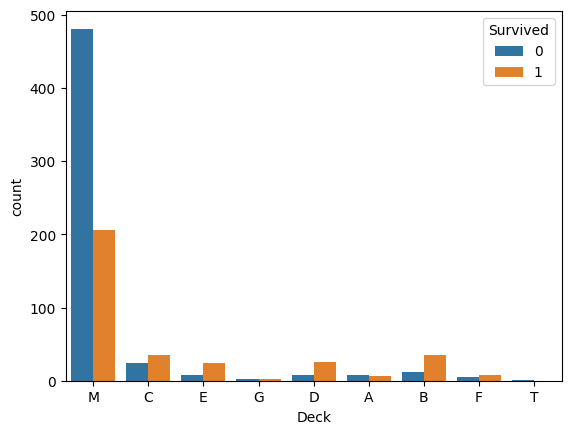

In [ ]:
# Deck 컬럼 분석해보기(시각화)
import seaborn as sns # seaborn 라이브러리
# sns.countplot : 막대 그래프 / plt.bar와 동일
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Deck', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 인사이트 정리
# 임의로 채워준 M값에 사망률이 3분의 2정도 된다.
# 사망자가 많음
# Deck 컬럼과 생존 유무만으로는 Deck컬럼을 사용하는데 있어서 타당성을 확보하기 어렵다.
# 다른 컬럼과 엮어서 타당성이 있는지 확인

<Axes: xlabel='Deck', ylabel='count'>

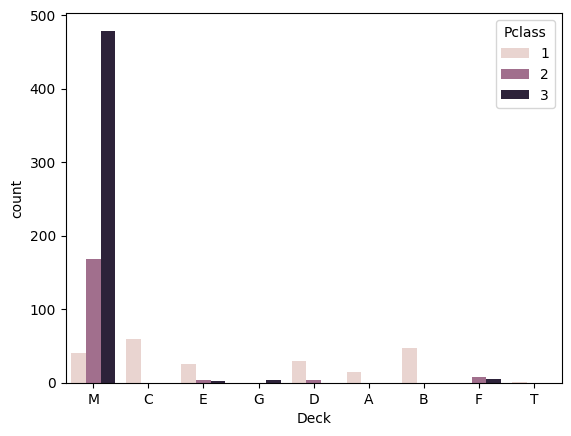

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# Deck 컬럼과 Pclass 컬럼 엮어보기
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Deck', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Pclass' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 인사이트 정리
# 현재 M이라는 값에 승객등급의 대부분은 3등급(승객 등급이 낮은편에 데이터가 많음)

<Axes: xlabel='Pclass', ylabel='count'>

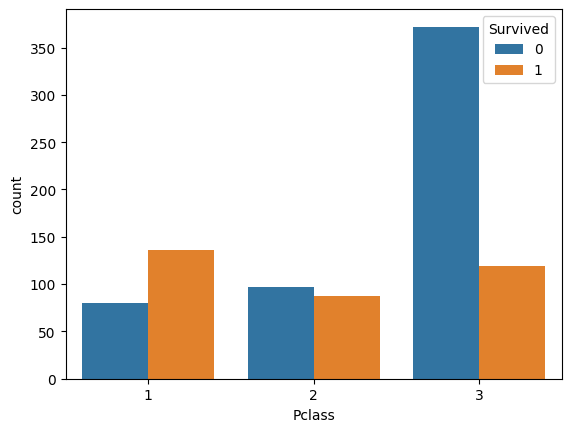

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Pclass', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 인사이트 정리
# 3등급인 사람이 많이 죽었다.

# Deck 컬럼 최종 정리
# 'M'이라는 값을 가지고 있는 사람이 3등급이 많았다.
# 3등급의 생존율은 낮다.
# 'M'이라는 값을 가진 사람은 생존율이 낮다.
# 다른 컬럼과 엮어서 타당성을 살펴보니 'Deck'컬럼의 활용가치가 있다고 판단된다. -> 삭제하지 않겠다.

In [ ]:
# 범주형 데이터와 정답 데이터를 활용해서 인사이트 찾아보기(13:30까지)
# 정답 데이터 - Survived(생존 여부) 0 / 1 - 숫자(범주형)
# 범주형 데이터 : Pclass / Sex / Deck / Embarked

<Axes: xlabel='Sex', ylabel='count'>

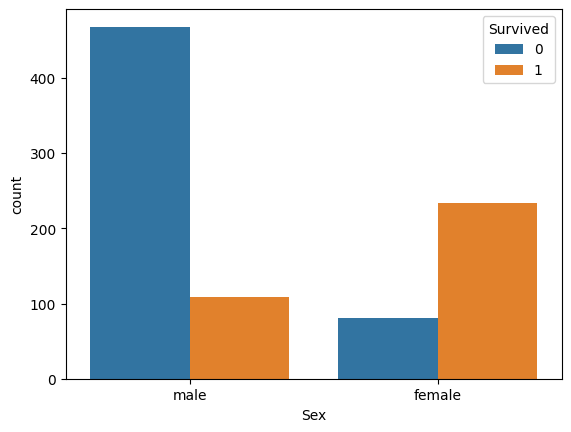

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# 성별과 생존 여부
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Sex', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 인사이트 정리
# 남성이 여성보다 승선인원이 많았다.
# 생존 확률은 여성이 더 높았다.
# 왜 여성의 생존 확률이 더 높았을까?
# 타이타닉의 사고 년도는 몇년? 1912년
# 근현대사(근대 -> 현대) - 시대상
# 노블리스 오블리주 / 기사도 -> 개념이 뿌리 깊었다.(약자 우선 보호)

<Axes: xlabel='Embarked', ylabel='count'>

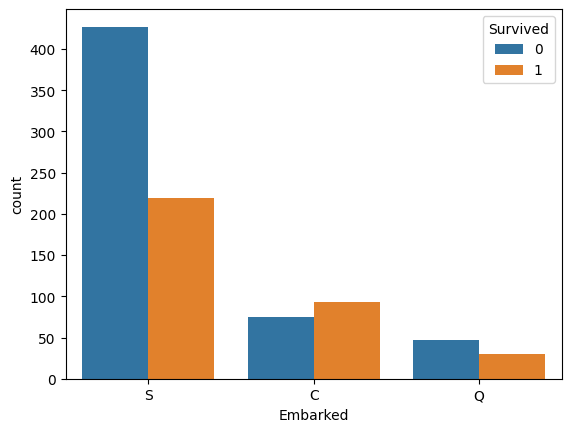

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# 성별과 생존 여부
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Embarked', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 사우스햄튼에서 많은 사람이 승선했다.
# 사망자도 사우스햄튼에서 많이 발생했다.
# 승선지만으로는 정보가 부족하다. 다른 컬럼을 엮어보자

<Axes: xlabel='Embarked', ylabel='count'>

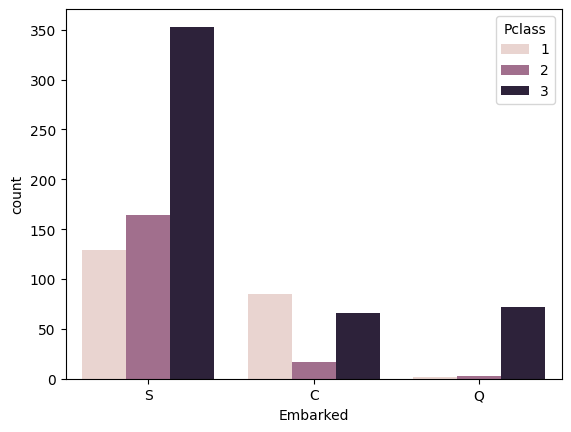

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# 성별과 생존 여부
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Embarked', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Pclass' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 사우스햄튼 / 퀸즈타운 -> 1 / 2 / 3 순차로 계단형식 -> 등급별 분위가 1등급은 낮고 3등급은 많았다.
# 상류층 적음 / 하위 계층이 많았다.
# 쉘부르크는 2등급의 승객이 적었다.
# 퀸즈 타운 사람들이 많이 탔다. / 승선지와 생존 유무 엮어보자

<Axes: xlabel='Embarked', ylabel='count'>

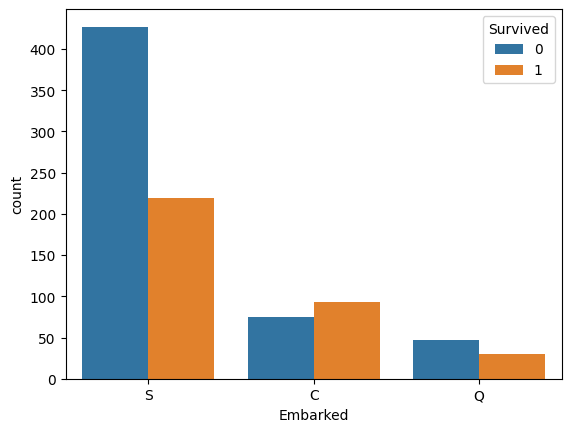

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# 성별과 생존 여부
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Embarked', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 사우스햄튼은 사망자가 많았다.
# 퀸즈 타운 -> 3등급 승선객이 많은 대비 생존율이 좋은 편이다.
# 쉘부르크 -> 1등급 승객이 가장 많이 탔다. -> 생존율이 좋다. 1등급의 승객 생존율이 쉘부르크 생존율에 영향을 미쳤을까?

<Axes: xlabel='Embarked', ylabel='count'>

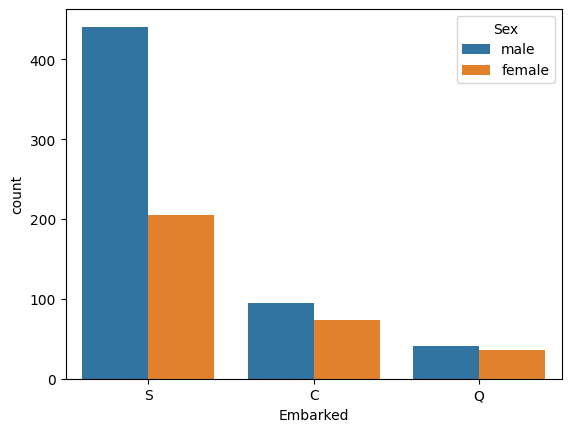

In [ ]:
# sns.countplot : 막대 그래프 / plt.bar와 동일
# 성별과 생존 여부
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Embarked', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Sex' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 수치형 데이터 해석 -
train.info()
# Age / Sibsp / Parch / Fare / Survived

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


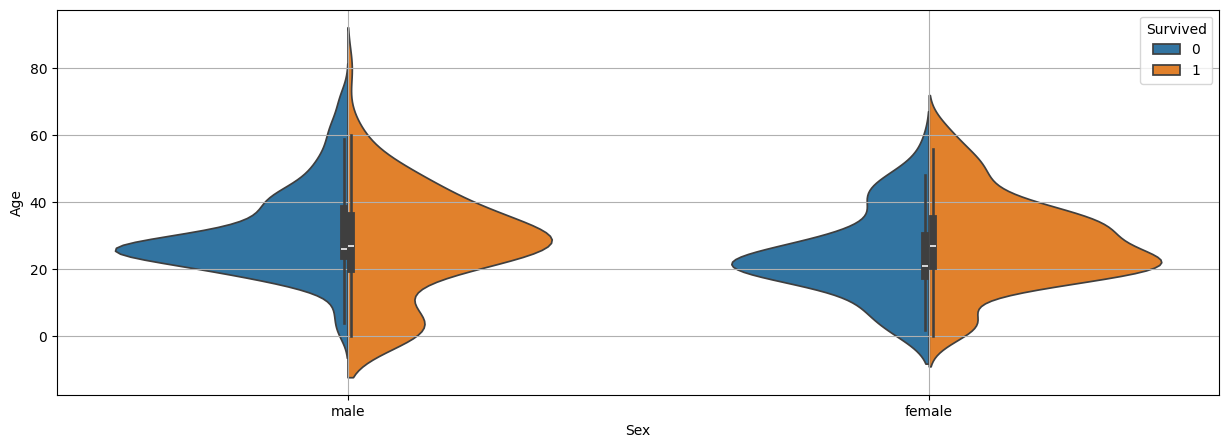

In [ ]:
# Age 컬럼 시각화
# 바이올린 차트
# sns.violinplot() : 바이올린의 형태로 데이터의 분포와 밀도를 한눈에 보기 좋게 곡선형의 그래프로 그려주는 방식
# 분포가 많은 부분은 두껍게 표시 / 분포가 적은 부분은 얇게 표시
plt.figure(figsize = (15, 5))
sns.violinplot(data = train,
               x = 'Sex',
               y = 'Age',
               hue = 'Survived',
               split = True
               )
plt.grid()
plt.show()

In [ ]:
# 20대에서 40대 남녀 구분 상관없이 가장 많은 사람들이 탔고 사망률도 높다.
# 특이점을 찾아보자.
# 10대 이하 부분에서 여성의 생존율은 낮으나 남성의 생존율은 상대적으로 높은편
# 10대 이하 남성들 대부분 생존
# 왜? 10대 이하 남성에 생존 여부가 높을까?
# 대를 이을 수 있고 상속 권리가 있는 남자아이를 우선적으로 살렸을 가능성이 높다.
# 10대 이하 어린아이는 성별에 영향을 안받는다(여성 생존 비율 낮음)

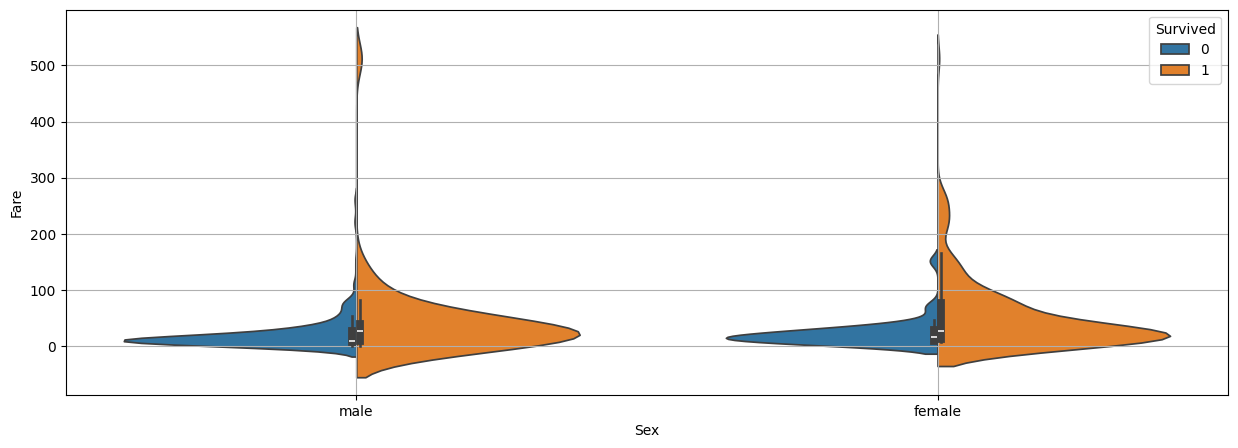

In [ ]:
# Fare 컬럼 시각화
plt.figure(figsize = (15, 5))
sns.violinplot(data = train,
               x = 'Sex',
               y = 'Fare',
               hue = 'Survived',
               split = True
               )
plt.grid()
plt.show()

In [ ]:
# 금액을 많이 낸 사람들은 VIP로 대우받으면서 편의성과 안전부분에서 혜택을 봤다.
# 금액을 많이 낸 사람의 빈도가 얼마 되지 않는다.

In [ ]:
# Parch / Sibsp 살펴보기
# Parch : 동승한 부모와 자식의 수
# Sibsp : 함께 탑승한 형제 자매 / 배우자의 수
# 이거 합하면 가족의 수가 나온다.

In [ ]:
# 전체 가족의 숫자를 구해서 새로운 컬럼을 생성해보자
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

<Axes: xlabel='Family_size', ylabel='count'>

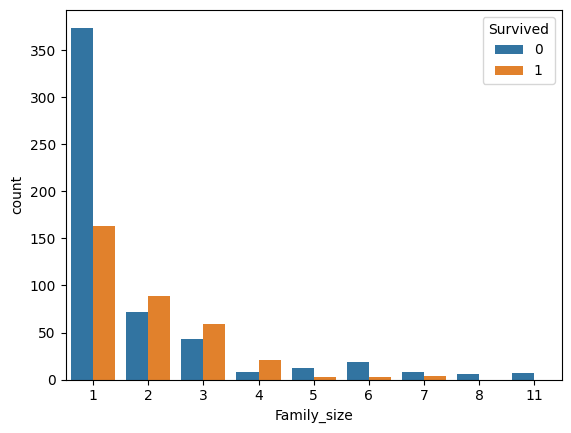

In [ ]:
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Family_size', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 가족 수치 데이터 범주화
bin_size = [0, 1, 4, 11] # 데이터를 쪼개줄 경계값 / 경계값은 미포함, 끝 값이 포함된다.
label_name = ['Alone', 'Small', 'Large']

# Family_Group 컬럼명을 가진 컬럼을 생성해서 값을 범주화 시키겠다.
# pd.cut() : 연속된 수치 데이터를 특정 기준으로 잘라서 범주화 시키겠다.
train['Family_Group'] = pd.cut(train['Family_size'], bins = bin_size, labels = label_name)
test['Family_Group'] = pd.cut(test['Family_size'], bins = bin_size, labels = label_name)
# bins = 범주의 경계값
# labels = 범주의 명칭

In [ ]:
train['Family_size']

,Family_size
PassengerId,
1,2
2,2
3,1
4,2
5,1
...,...
887,1
888,1
889,4


In [ ]:
train['Family_Group']

,Family_Group
PassengerId,
1,Small
2,Small
3,Alone
4,Small
5,Alone
...,...
887,Alone
888,Alone
889,Small


<Axes: xlabel='Family_Group', ylabel='count'>

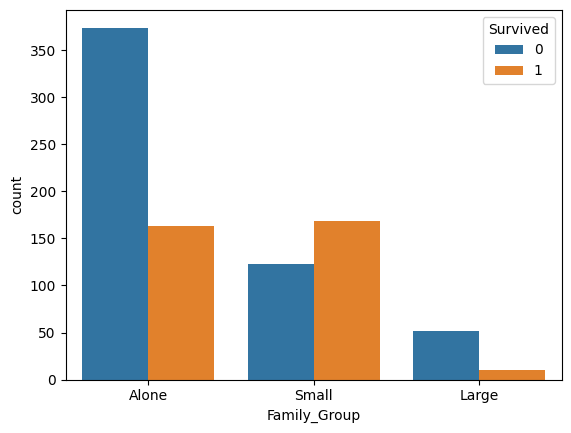

In [ ]:
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Family_Group', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 범주화 작업(binning)
# 범주화 작업의 장점은 각각의 데이터를 볼때 놓칠수 있었던 미세한 차이를 공통된 특성으로 묶어 도드라지게 만들어주는 장점


In [ ]:
# 우리가 살펴보지 않은 데이터를 살펴보자
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_size   891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 98.5+ KB


In [ ]:
# Ticket 컬럼 살펴보기
# 표에 있는 고유 번호를 적어놓은 컬럼
# 고유 번호 -> 데이터가 넓고 얕게 분포
train['Ticket'].unique()
# 티켓의 번호가 균일하지 않다.
# 데이터를 분석하기 위한 패턴이 안보인다.
# 굳이 이 티켓을 써야한다면, 승객 등급 / 객실 번호와 연동해서 쓸 수 있다.
# 하지만 데이터 전처리 대비 분석 효율성은 낮아진다.
# Ticket데이터는 과감하게 삭제 - 데이터 정리시에 한번에 삭제

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
# Name 컬럼 분석하기
train['Name']

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


In [ ]:
# 이름은 고유값이라 사용하기 힘들어 보인다.
# 서양 이름 체계중 미들네임(중간호칭)만 추출해서 직업 / 신분 / 성별 / 결혼 유무를 확인해서
# 다른 데이터를 뒷받침할 근거자료로 사용해보자.
# 분할 테스트 시작
train['Name'][1]

'Braund, Mr. Owen Harris'

In [ ]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [ ]:
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [ ]:
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [ ]:
# 함수 정의
def split_name(data) :
    return data.split(',')[1].split('.')[0].strip()

In [ ]:
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_size   891 non-null    int64   
 13  Family_Group  891 non-null    category
 14  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(7)
memory usage: 137.7+ KB


In [ ]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

**미들네임 정리**
- 'Mr : 기혼 남성
- 'Mrs' : 기혼 여성
- 'Miss' : 미혼 여성
- 'Master' : 나이가 젊은 미성년 남자를 높여 부르는 호칭
- 'Don' : 남성에 대한 존칭
- 'Rev' : 목사(타이타닉 전체 승객 데이터 중 목사는 6명, 전원 사망)
- 'Dr' : '의사 / 박사'
- 'Mme' : (프랑스어) 마담 / 기혼 여성
- 'Ms' : 기혼 / 미혼 고려 X 여성
- 'Major' : 소령
- 'Lady' : 영애
- 'Sir' : 기사 작위
- 'Mlle' : (프랑스어) 마드모아젤 - 미혼여성(Miss)
- 'Col' : 대령
- 'Capt' : (육군) 대위 / (해군) 대령
- 'the Countess' : 여백작
- 'Jonkheer' : 작위가 없는 귀족

In [ ]:
# 미들네임에 대한 분포 확인
# 1. 데이터의 순서를 변경시켜 생존 유무가 확실한 Rev라는 미들네임을 앞으로 정리 해두자
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don',  'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

<Axes: xlabel='Title', ylabel='count'>

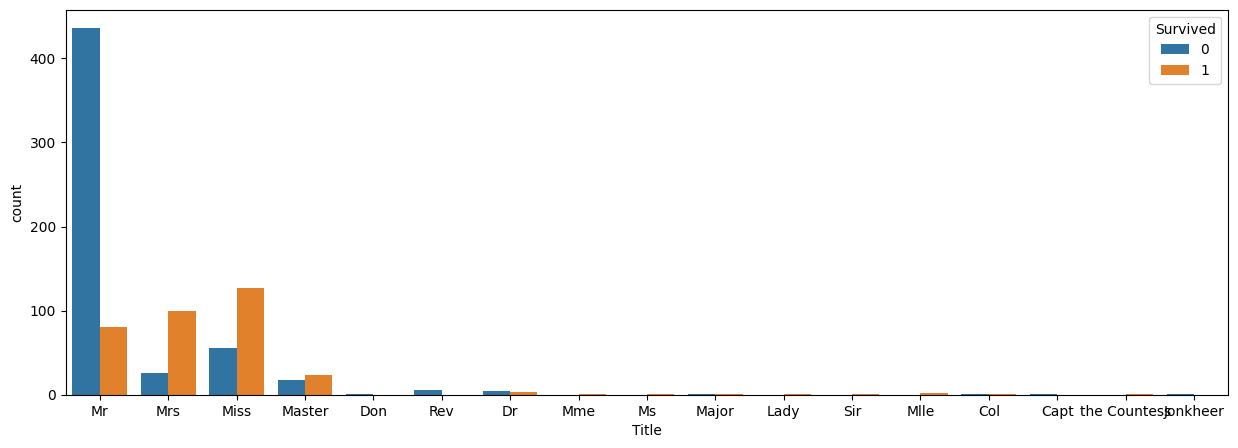

In [ ]:
# 2. 시각화를 통해 분포 확인
plt.figure(figsize = (15, 5))
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Title', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# 3. 분포 확인 후 범주화를 위해 변경값 지정
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [ ]:
# 4. 원본 타이틀 목록과 변환된 타이틀 값을 딕셔너리 형태에 키와 밸류로 묶어주자
title_dict = dict(zip(title, convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [ ]:
# 5. 실제 변환 진행
train['Title'] = train['Title'].map(title_dict)
# map() : 딕셔너리를 입력 받았을때 Key에 해당하는 값을 value로 치환하는 함수

In [ ]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

<Axes: xlabel='Title', ylabel='count'>

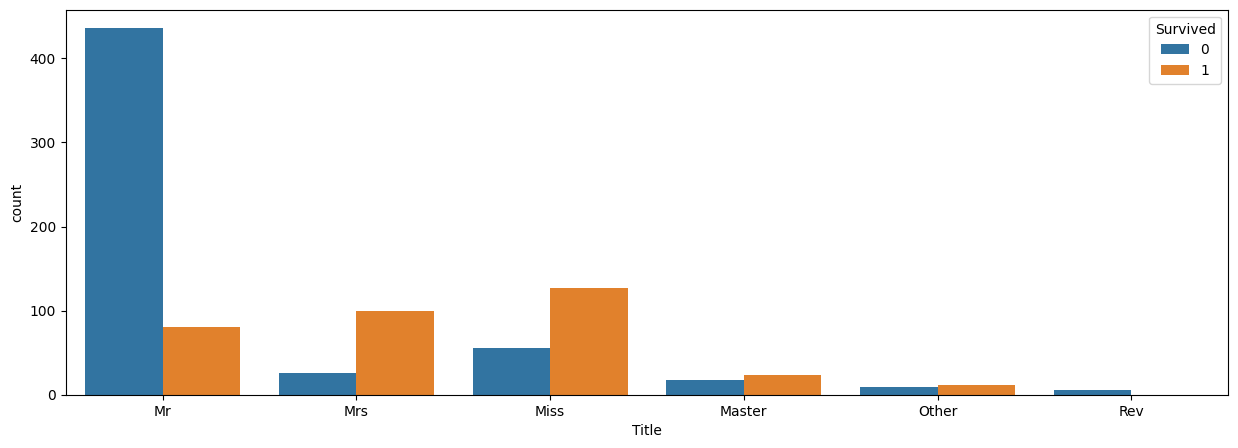

In [ ]:
# 2. 시각화를 통해 분포 확인
plt.figure(figsize = (15, 5))
sns.countplot(data = train, # 훈련데이터가 들어있는 데이터프레임
              x = 'Title', # x축에 들어가는 Data / Deck컬럼의 유니크값 가져와서 출력
              hue = 'Survived' # 유니크 값에 대해 각각의 차트 그려주세요 + 범례도 출력
              )

In [ ]:
# test 데이터에는 중간 호칭이 Dona라는 데이터가 숨어있다.
# 결측치를 확인해보자
test[test['Title'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_size,Family_Group,Title
PassengerId,,,,,,,,,,,,,,


In [ ]:
# test데이터이 있는 Dona도 Other로 바꿔주자
# 방법 1. 위쪽에 선언한 convert_title 딕셔너리 내부에 Dona : Other 추가하는 방법
# 방법 2. fillna 함수 이용해서 Dona 값을 채워주자

In [ ]:
# 방법1 채택
title_dict['Dona'] = 'Other'

In [ ]:
# 5. 실제 변환 진행
test['Title'] = test['Title'].map(title_dict)
# map() : 딕셔너리를 입력 받았을때 Key에 해당하는 값을 value로 치환하는 함수

In [ ]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [ ]:
# 만약 방법 2를 채택한다면
# 방법 1에서 딕셔너리에 Dona 추가하는 코드를 비활성화 하고
# 변환을 진행한 후에 fillna함수 이용해서 Other
# 이때 새로운 호칭이 또 등장하게 되면 그 값도 Other로 채워지는 단점이 있다.
# 방법 1의 코드 순서
# test 변경시 : title_dict에 Dona 값 Other로 채워주고 이후에 변환을 해야한다.
# 방법 2의 코드 순서
# test 변경을 진행하고 결측치를 찾아서 Other값으로 채워주면 된다.

### 불필요한 데이터 삭제

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_size   891 non-null    int64   
 13  Family_Group  891 non-null    category
 14  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(7)
memory usage: 137.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Cabin         418 non-null    object  
 9   Embarked      418 non-null    object  
 10  Deck          418 non-null    object  
 11  Family_size   418 non-null    int64   
 12  Family_Group  418 non-null    category
 13  Title         418 non-null    object  
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 46.3+ KB


In [ ]:
# 삭제할 컬럼 목록
# Name, SibSp, Parch, Ticket, Cabin, Family_size
# 삭제하는 방법 3가지
# 리스트 이용해서 한번에 삭제
# 반복문 이용해서 삭제
# 하나하나 삭제 - 채택
# 현재 열을 삭제 -> axis = 1
train.drop('Ticket', axis = 1, inplace = True) # inplace = True : 편한데 잘써야함 / inplace를 활성화 시키면 삭제한 후에 train에 바로 저장
# train = train.drop('Ticket', inplace = True) -> 자주 하는 실수
train.drop('SibSp', axis = 1, inplace = True)
train.drop('Parch', axis = 1, inplace = True)
train.drop('Name', axis = 1, inplace = True)
train.drop('Cabin', axis = 1, inplace = True)
train.drop('Family_size', axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [ ]:
test.drop('Ticket', axis = 1, inplace = True) # inplace = True : 편한데 잘써야함 / inplace를 활성화 시키면 삭제한 후에 train에 바로 저장
# train = train.drop('Ticket', inplace = True) -> 자주 하는 실수
test.drop('SibSp', axis = 1, inplace = True)
test.drop('Parch', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)
test.drop('Family_size', axis = 1, inplace = True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      418 non-null    object  
 5   Deck          418 non-null    object  
 6   Family_Group  418 non-null    category
 7   Title         418 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 26.7+ KB


In [ ]:
# 데이터 분리
X_train = train.drop('Survived', axis = 1)
X_test = test
y_train = train['Survived']

In [ ]:
X_train.info(),  X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   Fare          891 non-null    float64 
 4   Embarked      891 non-null    object  
 5   Deck          891 non-null    object  
 6   Family_Group  891 non-null    category
 7   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 89.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      

(None, None)

In [ ]:
# 현재 타이타닉 데이터는 문자형의 자료가 대부분이다.
# 연산을 통해 예측을 진행하는 머신 / 딥러닝 모델은 숫자값을 입력받길 기대한다.
# 문자 데이터는 연산이 불가능하기에 값을 숫자로 바꿔주자
# 이때 사용하는 방법은 더미 변수화(원 핫 인코딩)
dummy_feature = ['Sex', 'Embarked', 'Deck', 'Family_Group', 'Title']
# pd.get_dummies() : 원핫 인코딩 진행해주세요
# prefix : 접두사
for dummy in dummy_feature :
    col = pd.get_dummies(train[dummy], prefix = dummy, dtype = int)
    X_train = pd.concat([X_train, col], axis = 1)
    X_train.drop(dummy, axis = 1, inplace = True)

In [ ]:
X_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,71.2833,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,7.9250,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,53.1000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,8.0500,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,13.0000,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,1,19,30.0000,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
889,3,21,23.4500,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
for dummy in dummy_feature :
    col = pd.get_dummies(test[dummy], prefix = dummy, dtype = int)
    X_test = pd.concat([X_test, col], axis = 1)
    X_test.drop(dummy, axis = 1, inplace = True)

In [ ]:
X_test

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
893,3,47,7.0000,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9.6875,0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12.2875,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,8.0500,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
1306,1,39,108.9000,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1307,3,38,7.2500,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [ ]:
X_train.shape, X_test.shape

((891, 26), (418, 25))

In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [ ]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [ ]:
X_train[X_train['Deck_T'] == 1]

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
340,1,45,35.5,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [ ]:
# Deck_T는 Train 데이터에 1개 존재하는 데이터
# T라는 공간은 타이타닉 내부에서 존재하지 않는 공간
# X_test에는 없다. -> 오기일수 있다.
# 데이터를 삭제하기는 아까우니 test에 데이터를 추가해서 사용해보겠다.
X_test['Deck_T'] = 0

In [ ]:
# 순서 또한 Train / Test 동일하게 맞춰주겠다.
# 1. train에서 Deck_T만 별도로 떼어 저장한 후 마지막에 붙여주는 방법
# 2. train의 컬럼 순서대로 재배치 하는 방법 - 채택
X_test = X_test[X_train.columns]

In [ ]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [ ]:
set(X_train) - set(X_test)

set()

### 전처리 끝 / 모델링 시작

In [ ]:
# model import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 교차검증
from sklearn.model_selection import cross_val_score

In [ ]:
# 모델 객체 생성
knn_clf = KNeighborsClassifier()
tree_clf = DecisionTreeClassifier()

In [ ]:
# 모델 학습
knn_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 답을 제출하기전에 교차 검증을 진행해보자
# knn
# cross_val_score(교차검증할 모델, 훈련용 문제 데이터, 훈련용 정답 데이터, cv = 데이터를 분할할 값)
rs_knn = cross_val_score(knn_clf, X_train, y_train, cv = 5)
print(rs_knn)
print(rs_knn.mean())

[0.67597765 0.69101124 0.71910112 0.73033708 0.73595506]
0.7104764296026614


In [ ]:
rs_tree = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print(rs_tree)
print(rs_tree.mean())

[0.7877095  0.7752809  0.82022472 0.76966292 0.79213483]
0.7890025735986441


In [ ]:
# 답안지 만들기
# 1. 각 모델별 예측값 저장하기
pred_knn = knn_clf.predict(X_test)
pred_tree = tree_clf.predict(X_test)

In [ ]:
# 2. 답안지 파일 불러오자
submit = pd.read_csv('./data/gender_submission.csv', index_col = 'PassengerId')
submit

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
# 답안지에 답 기입 - KNN 모델의 정답 체크해보자
submit['Survived'] = pred_knn

In [ ]:
# 파일 저장하는 방법
# df명.to_csv(경로 및 파일이름 확장자)
submit.to_csv('./knn_submit01.csv')

In [ ]:
# 답안지에 답 기입 - KNN 모델의 정답 체크해보자
submit['Survived'] = pred_tree

In [ ]:
# 파일 저장하는 방법
# df명.to_csv(경로 및 파일이름 확장자)
submit.to_csv('./tree_submit01.csv')

In [ ]:
# 1. knn 모델의 교차검증 점수 : 71% / 실제 성능 점수 64%
# -> 원인 분석 : KNN은 거리 기반 모델 -> 거리기반의 모델이나 수치 해석 모델은 데이터를 깔끔하게 정리하는
# 스케일링을 해주면 성능이 올라가고 일반화가 진행될 가능성이 높다
# 스케일링 진행하지 않았기 때문에 스케일링 진행 해보자.

# 2. Tree 모델의 교차검증 점수 : 78% / 실제 성능 점수 71%
# -> 원인 분석 : 현재 하이퍼 파라미터 조정이 진행되지 않았다.
# 과대적합에 민감한 Tree모델이 일반화 상태가 되도록 사전 가지치기 진행해보자.

In [ ]:
# 트리모델 하이퍼 파라미터 성능 개선해보기
tree_clf = DecisionTreeClassifier(max_depth = 3)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred_tree = tree_clf.predict(X_test)
# 답안지에 답 기입 - KNN 모델의 정답 체크해보자
submit['Survived'] = pred_tree
submit.to_csv('./tree_submit02.csv')

In [ ]:
rs_tree = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print(rs_tree)
print(rs_tree.mean())

[0.82681564 0.79213483 0.8258427  0.78651685 0.84831461]
0.8159249262444291


In [ ]:
# knn 모델의 성능을 올려보자
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler(표준화) : 모든 데이터를 보고 평균이 0 / 분산이 1이라는 값으로 출력되도록 값을 변경
# MinMaxScaler(정규화) : 데이터의 최대값을 1 / 최소값을 0으로 바꿔주고 그 사이에 연속된 실수 형태로 데이터 변경

In [ ]:
ss_scaler = StandardScaler()

In [ ]:
# 스케일러 값 학습
ss_scaler.fit(X_train)

StandardScaler()

In [ ]:
# 현재 스케일러 값을 학습 시켰다! / 실제 값이 변환되었는가?
# 스케일러가 어떤 패턴으로 값을 변환시킬지 정보를 얻었으니 이 정보로 값을 변환 시키자
X_train_ss = ss_scaler.transform(X_train)
X_test_ss = ss_scaler.transform(X_test)
# 주의점 : train과 test값을 스케일링 진행할 시 같은 방법에 같은 패턴으로 변환을 시켜야 한다.

In [ ]:
knn_clf.fit(X_train_ss, y_train)

KNeighborsClassifier()

In [ ]:
pred_knn_ss = knn_clf.predict(X_test_ss)
# 답안지에 답 기입 - KNN 모델의 정답 체크해보자
submit['Survived'] = pred_knn_ss
submit.to_csv('./knn_submit02.csv')

In [ ]:
rs_knn_ss = cross_val_score(knn_clf, X_train_ss, y_train, cv = 5)
print(rs_knn_ss)
print(rs_knn_ss.mean())
# 스케일링을 사용하는 이유 : 데이터간에 분포가 다르고 최대 / 최소값이 다르다
# 값이 급격하게 바뀌는 데이터 / 얼마 바뀌지 않는 데이터도 있다.
# 데이터간의 편차가 크기에 모델이 학습할때 어려움을 느끼고 패턴을 잡기 까다롭다.
# 데이터의 특성 구간을 동일한 기준으로 맞춰주는 작업을 진행한다.
# tree 모델은 스케일링이 필요 없다. -> 값을 이용해서 True / False 나눠줌 / 실제 수치해석을 하는 게 아니라서 굳이 할 필요는 없다.

[0.82122905 0.79213483 0.81460674 0.76966292 0.85393258]
0.8103132257862031
